**1. Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


**2. Load the Dataset**

In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**3. Understand the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

**4. Data Cleaning**

**Rename columns for readability**

In [8]:
df.columns = df.columns.str.strip()

**Convert Date column to datetime**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5700\2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


**Check missing values**

In [10]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

**If missing values exist:**

In [11]:
df = df.dropna()

**5. Exploratory Data Analysis (EDA)**

**Overall unemployment rate distribution**

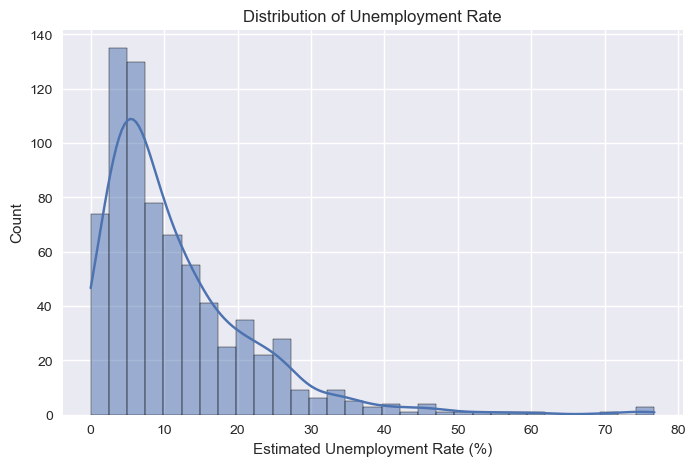

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated Unemployment Rate (%)'], kde=True)
plt.title("Distribution of Unemployment Rate")
plt.show()

**Average unemployment rate by region**

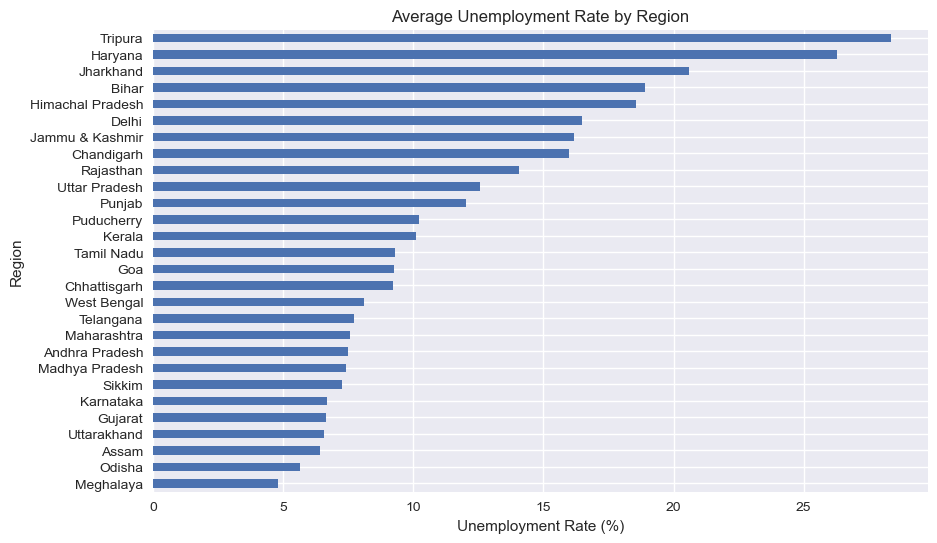

In [13]:
region_avg = df.groupby("Region")['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(10,6))
region_avg.plot(kind='barh')
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.show()


**6. Unemployment Trend Over Time (India)**

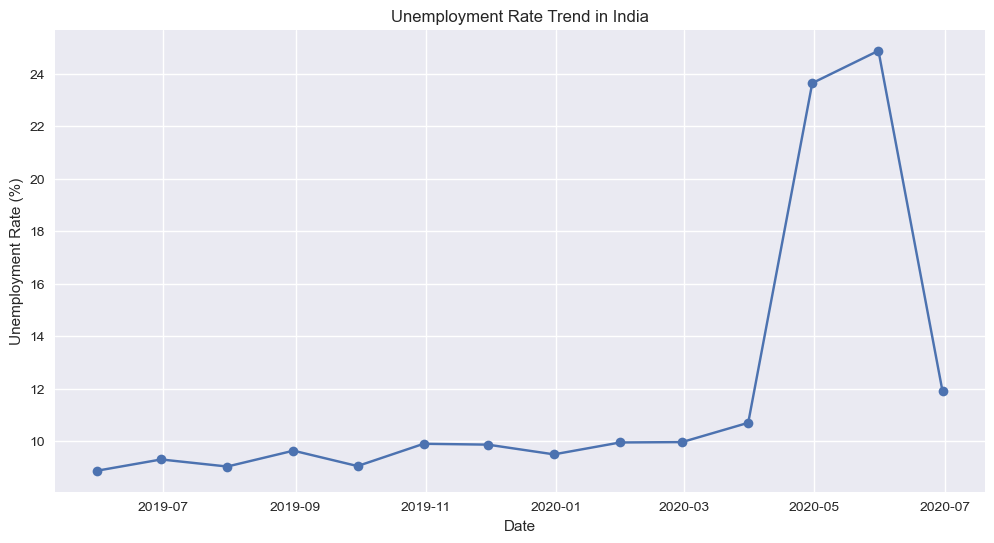

In [14]:
india_trend = df.groupby("Date")['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,6))
plt.plot(india_trend, marker='o')
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

**7. Impact of COVID-19 on Unemployment
Mark COVID period (March 2020 onwards)**

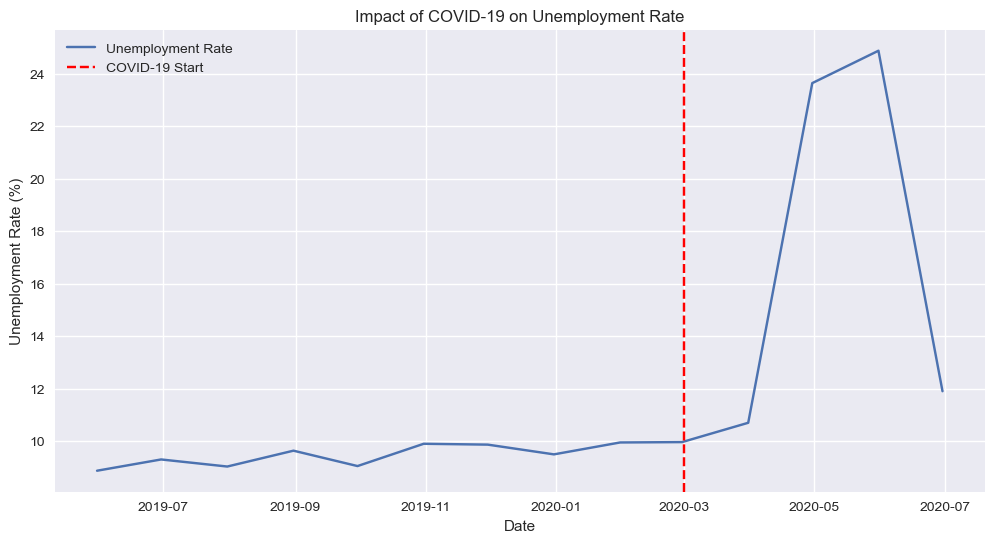

In [15]:
covid_start = "2020-03-01"

plt.figure(figsize=(12,6))
plt.plot(india_trend, label="Unemployment Rate")

plt.axvline(pd.to_datetime(covid_start), color='red', linestyle='--', label="COVID-19 Start")

plt.title("Impact of COVID-19 on Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

**Compare Pre-COVID vs Post-COVID**

In [16]:
pre_covid = df[df['Date'] < covid_start]['Estimated Unemployment Rate (%)'].mean()
post_covid = df[df['Date'] >= covid_start]['Estimated Unemployment Rate (%)'].mean()

print("Average Pre-COVID Unemployment Rate:", round(pre_covid, 2))
print("Average Post-COVID Unemployment Rate:", round(post_covid, 2))

Average Pre-COVID Unemployment Rate: 9.51
Average Post-COVID Unemployment Rate: 17.77


**8. Seasonal Trend Analysis**

**Extract Month & Year**

In [17]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

**Monthly Average Unemployment**

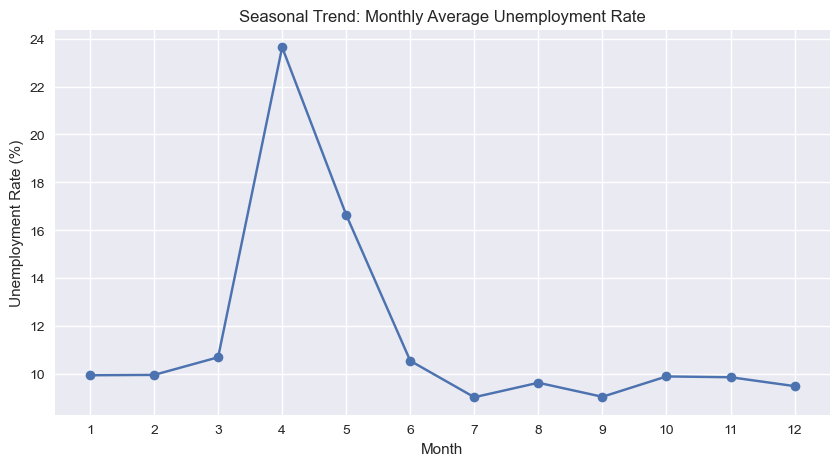

In [18]:
monthly_avg = df.groupby("Month")['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='line', marker='o')
plt.title("Seasonal Trend: Monthly Average Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1,13))
plt.show()

**Interpretation**

- Certain months show recurring spikes Indicates seasonal employment dependency

**9. Area-wise Unemployment (Urban vs Rural)**

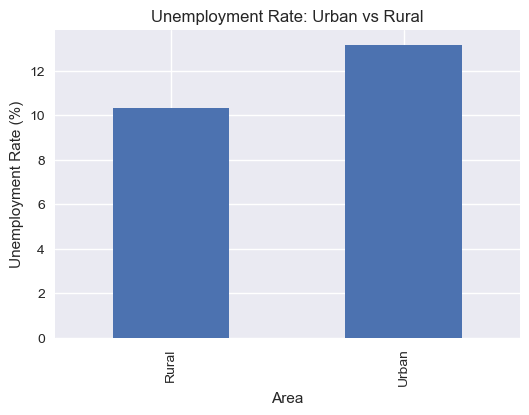

In [19]:
area_avg = df.groupby("Area")['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(6,4))
area_avg.plot(kind='bar')
plt.title("Unemployment Rate: Urban vs Rural")
plt.ylabel("Unemployment Rate (%)")
plt.show()

**10. Key Insights & Policy Implications**

#### Key Findings (You can write this in markdown cell)
#### Key Insights:
1. Unemployment rate sharply increased after March 2020 due to COVID-19.
2. Post-COVID unemployment remained consistently higher than pre-COVID levels.
3. Rural areas faced higher volatility compared to urban areas.
4. Seasonal patterns indicate higher unemployment during certain months.
5. Some regions consistently show higher unemployment rates.

#### Policy Implications:
- Need for emergency employment programs during economic shocks.
- Seasonal job guarantee schemes can stabilize rural employment.
- Region-specific economic policies are more effective.
- Skill development programs can reduce long-term unemployment.

**11. Conclusion**


This analysis highlights the severe impact of COVID-19 on employment in India,
reveals seasonal and regional unemployment patterns, and provides insights
that can help policymakers design targeted employment and economic recovery programs.